<a href="https://colab.research.google.com/github/shikhar00778/toxic-comment-classification/blob/master/FFT_Logmel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests 
from bs4 import BeautifulSoup 

In [0]:

  
def get_video_links(): 
      
    # create response object 
    r = requests.get(archive_url) 
      
    # create beautiful-soup object 
    soup = BeautifulSoup(r.content,'html5lib') 
      
    # find all links on web-page 
    links = soup.findAll('a') 
    #print(links)
    # filter the link sending with .mp4 
    video_links = [archive_url + link['href'] for link in links if link['href'].endswith('tgz')] 
  
    return video_links 

In [0]:
def download_video_series(video_links , language): 
  
    for link in tqdm.tqdm(video_links): 
  
        
        if not os.path.exists(language):
          os.makedirs(language)
        
        file_name = os.path.join(language,link.split('/')[-1])    
  
        #print("Downloading file" , file_name) 
          
        # create response object 
        r = requests.get(link, stream = True) 
          
        # download started 
        with open(file_name, 'wb') as f: 
            for chunk in r.iter_content(chunk_size = 1024*1024): 
                if chunk: 
                    f.write(chunk) 
          
        #print("downloaded!",file_name)
  
    #print("All videos downloaded!")
    return

In [0]:
lang = ['en' , 'es' , 'fr' , 'it' , 'de' , 'ru']

In [0]:
import os
import tqdm

In [0]:


for j in lang:
  archive_url = "http://www.repository.voxforge1.org/downloads/"+j+"/Trunk/Audio/Main/8kHz_16bit/"
  video_links = get_video_links()[:1000]
  download_video_series(video_links , j)
  

100%|██████████| 646/646 [04:59<00:00,  2.34it/s]


In [0]:
!ls

de  en	es  fr	it  ru	sample_data


In [0]:
!mkdir data

In [0]:
for j in lang:
  for files in os.listdir(j):
    
    tmp_path = os.path.join('data',j)
    
    if not os.path.exists(tmp_path):
      os.makedirs(tmp_path)
    
    cmd = "tar -xvzf "+os.path.join(j,files)+" -C "+ tmp_path
    os.system(cmd)

In [0]:
!ls data

de  en	es  fr	it  ru


In [0]:
!ls data/en/1337ad-20170321-ajg/wav


en-0532.wav  en-0534.wav  en-0536.wav  en-0538.wav  en-0540.wav
en-0533.wav  en-0535.wav  en-0537.wav  en-0539.wav  en-0541.wav


In [0]:
!mkdir wav_data

In [0]:
!ls

data  de  en  es  fr  it  ru  sample_data  wav_data


In [0]:
t = 1
for root, dirs, files in tqdm.tqdm(os.walk("data")):
    
        
    prefix = os.path.basename(root)
    for f in files:
      if len(f.split('.')) > 1 and f.split('.')[1] == 'wav':
        os.rename(os.path.join(root, f), os.path.join(root ,f.split('.')[0]+'_'+str(t)+'.wav'))
        t = t+1

16951it [00:03, 4999.08it/s]


In [0]:
!ls data/en/1028-20100710-hne/wav

ar-01_60247.wav  ar-04_60252.wav  ar-07_60246.wav  rp-31_60251.wav
ar-02_60255.wav  ar-05_60250.wav  rp-29_60248.wav
ar-03_60249.wav  ar-06_60253.wav  rp-30_60254.wav


In [0]:
!mkdir fast/train

In [0]:
for j in lang:
  tmp_path = os.path.join('wav_data',j) 
  
  if not os.path.exists(tmp_path):
    os.makedirs(tmp_path)    
    
  cmd = 'find data/'+j+'/ -name "*.wav" -type f -exec cp {} ./wav_data/'+j+'/ \;'
  os.system(cmd)

In [0]:
!ls wav_data/ru/  -l | wc -l

9372


In [0]:
lang_dict= {'en':1,'es':2,'it':3,'ru':4,'de':5,'fr':6}

In [0]:
file_list = []
label = []
for folder in os.listdir("wav_data"):
  files = os.listdir("wav_data/"+folder)
  files = files[:1000]
  for file in files:
    file_list.append("wav_data/"+folder+"/"+file)
    label.append(lang_dict[folder])

In [0]:
len(label)

6000

In [0]:
import pandas as pd
df = pd.DataFrame({"file":file_list,"label":label})

In [0]:
df.head()

,file,label
0,wav_data/es/es-0031_10556.wav,2
1,wav_data/es/06_5389.wav,2
2,wav_data/es/es-0027_6905.wav,2
3,wav_data/es/21_4580.wav,2
4,wav_data/es/85_4224.wav,2


In [0]:
df.to_csv("trainingData.csv",index=False)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import tqdm
import os
import librosa

In [0]:
import pandas as pd
df = pd.read_csv("trainingData.csv")

In [0]:
df.head()

,file,label
0,wav_data/es/es-0031_10556.wav,2
1,wav_data/es/06_5389.wav,2
2,wav_data/es/es-0027_6905.wav,2
3,wav_data/es/21_4580.wav,2
4,wav_data/es/85_4224.wav,2


In [0]:
y,sr = librosa.load("wav_data/es/es-0027_6905.wav",sr=8000)

In [0]:
y.shape[0]

82000

In [0]:
x = np.empty((6000,80000))
y = np.empty((6000,1))

In [0]:
!pip install pydub

In [0]:
ipd.Audio("wav_data/es/85_4224.wav")

In [0]:
from pydub import AudioSegment
from pydub.playback import play
import IPython.display as ipd

ct = 0
for index,rows in df.iterrows():
  path = rows[0]
  label = rows[1]
  print(path)
  ct=ct+1
  if ct==10:
    break
  

wav_data/es/es-0031_10556.wav
wav_data/es/06_5389.wav
wav_data/es/es-0027_6905.wav
wav_data/es/21_4580.wav
wav_data/es/85_4224.wav
wav_data/es/es-0010_8852.wav
wav_data/es/es-0039_428.wav
wav_data/es/es-0003_4279.wav
wav_data/es/87_8063.wav
wav_data/es/es-0013_1768.wav


In [0]:
import scipy.io.wavfile

In [0]:
!ls fft

06_5389.wav.png        es-0009_4084.wav.png  es-0025_4046.wav.png
119_6544.wav.png       es-0010_459.wav.png   es-0026_5601.wav.png
21_4580.wav.png        es-0010_8852.wav.png  es-0026_8998.wav.png
41_5369.wav.png        es-0011_7880.wav.png  es-0027_5160.wav.png
46_7976.wav.png        es-0013_1768.wav.png  es-0027_6905.wav.png
81_4217.wav.png        es-0013_8808.wav.png  es-0029_3413.wav.png
81_8024.wav.png        es-0015_6958.wav.png  es-0029_7308.wav.png
85_4224.wav.png        es-0017_220.wav.png   es-0031_10556.wav.png
87_8063.wav.png        es-0018_4262.wav.png  es-0032_1305.wav.png
es-0000_3440.wav.png   es-0019_1732.wav.png  es-0032_1878.wav.png
es-0003_4279.wav.png   es-0021_4427.wav.png  es-0035_10652.wav.png
es-0004_2483.wav.png   es-0022_4001.wav.png  es-0039_428.wav.png
es-0004_4811.wav.png   es-0023_8647.wav.png  es-0039_588.wav.png
es-0005_10688.wav.png  es-0024_7860.wav.png  es-0040_2078.wav.png
es-0005_8793.wav.png   es-0025_1684.wav.png  es-0041_1930.wav.png
es-0008_82

In [0]:
def process_audio(input_path,output_path):
  #sr,audio = scipy.io.wavfile.read(input_path)
  #while audio.shape[0]<length:
  #  audio=np.concatenate((audio,audio),axis=None)
  #audio=audio[:length]

 


  #plt.specgram(audio,Fs=sr)

  y,sr = librosa.load(input_path)
  S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64,fmax=8000)
  plt.figure(figsize=(8, 4))
  librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
  #plt.colorbar(format='%+2.0f dB')
  #plt.title('Mel spectrogram')
  #plt.tight_layout()


  '''pre_emphasis = 0.97
  y=audio
  emphasized_signal = np.append(y[0], y[1:] - pre_emphasis * y[:-1])
  y = emphasized_signal
  S = np.abs(librosa.stft(y))
  log_S = librosa.power_to_db(S, ref=np.max)
  librosa.display.specshow(log_S,x_axis='time',y_axis='log')'''
  fig1 = plt.gcf()
  plt.axis('off')
  #plt.show()
  #fig1.set_size_inches(4,4)
  plt.savefig(output_path)
  plt.cla()
  plt.clf()
  plt.close()

In [0]:
length = 80000
ct = 0

for index,rows in tqdm.tqdm(df.iterrows()):
  if index > 3000:
    continue
  path = rows[0]
  label = rows[1]
  process_audio(path,"logmel/"+path.split("/")[2]+".png")
  '''audio, sr = librosa.load(path,sr=8000)
  while audio.shape[0]<length:
    audio=np.concatenate((audio,audio),axis=None)
  audio=audio[:length]
  pre_emphasis = 0.97
  emphasized_signal = np.append(audio[0], audio[1:] - pre_emphasis * audio[:-1])'''
  #x[ct] = emphasized_signal
  y[ct] = label
  #print(lang)
  #print(ct)
  ct=ct+1

In [0]:
!mkdir logmel/

In [0]:
!ls fft 

In [0]:
!mkdir fastai_data

In [0]:
df = pd.read_csv('trainingData.csv')

In [0]:
name = []
for index , row in df.iterrows():
  name.append(row[0].split('/')[2].split('.')[0])

In [0]:
df['name'] = name

In [0]:
import tqdm

In [28]:
for files in tqdm.tqdm(os.listdir('fft')):
  folder = str(list(df.loc[df['name'] == files.split('.')[0]]['label'])[0])
  #print(folder)
  tmp_path = os.path.join('fast/train',folder)
  if not os.path.exists(tmp_path):
    os.makedirs(tmp_path)
  
  cmd = 'cp fft/'+files+' fast/train/'+folder
  #print(cmd)
  os.system(cmd)
  #break

100%|██████████| 6000/6000 [01:15<00:00, 79.09it/s]


In [0]:
!mkdir fastlogmel/valid

In [0]:
import tqdm
import os
import pandas as pd

In [0]:
df = pd.read_csv('trainingData.csv')

In [12]:
for files in tqdm.tqdm(os.listdir('logmel')):
  folder = str(list(df.loc[df['name'] == files.split('.')[0]]['label'])[0])
  #print(folder)
  tmp_path = os.path.join('fastlogmel/train',folder)
  if not os.path.exists(tmp_path):
    os.makedirs(tmp_path)
  
  cmd = 'cp logmel/'+files+' fastlogmel/train/'+folder
  #print(cmd)
  os.system(cmd)

100%|██████████| 6000/6000 [00:58<00:00, 101.94it/s]


In [14]:
!ls fastlogmel/train/1 | wc -l

1000


In [0]:
!rm -r fast/train/fastai_data/

In [0]:
!mv fastai_data/ fast/train/

In [0]:
from fastai.vision import *

In [0]:
path = "fast/"
tfms = get_transforms(do_flip=False)

data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=24,valid_pct=0.3)


In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)


/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:04<00:00, 21874853.47it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


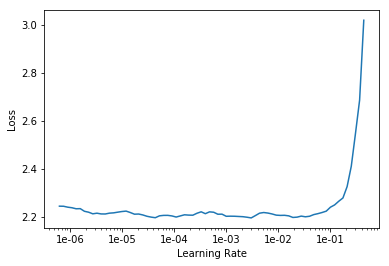

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.175680,1.858750,0.785556,00:31
1,2.136058,1.816351,0.750556,00:28


In [0]:
learn.fit_one_cycle(50, max_lr=slice(1e-3))

In [0]:
from keras.layers import *
from keras.callbacks import *
from keras.models import *
from keras.utils import *
from keras.optimizers import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp drive/'My Drive'/wav_data.zip .

In [0]:
!cp drive/'My Drive'/fft.zip .

In [11]:
!ls

drive  fft  fft.zip  sample_data  wav_data.zip


In [0]:
!unzip wav_data.zip

In [0]:
file_list = []
label = []
for folder in os.listdir("wav_data"):
  files = os.listdir("wav_data/"+folder)
  files = files[:1000]
  for file in files:
    file_list.append("wav_data/"+folder+"/"+file)
    label.append(lang_dict[folder])

In [17]:
len(label)

6000

In [0]:
import pandas as pd
df = pd.DataFrame({"file":file_list,"label":label})

In [0]:
df.to_csv('trainingData.csv' , index = False)

In [0]:
df

In [0]:
!unzip fft.zip

In [0]:
for folder in os.listdir("wav_data/"):
  for files in os.listdir()

In [0]:
!ls fft

In [0]:
np.save("raw_audio.npy",x)
np.save("raw_labels.npy",y)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
np.count_nonzero(y==0)

0

In [0]:
y_test.shape

(1200, 7)

In [0]:
 def get_1d_conv_model():
    
    nclass = 7
    input_length = 80000
    
    inp = Input(shape=(input_length,1))
    #x = BatchNormalization()(inp)
    x = Convolution1D(32, 9, activation='relu', padding="same")(inp)
    x = Convolution1D(32, 9, activation='relu', padding="same")(x)
    x = MaxPool1D(16)(x)
    x = Dropout(rate=0.1)(x)
    
    x = Convolution1D(64, 3, activation='relu', padding="same")(x)
    x = Convolution1D(64, 3, activation='relu', padding="same")(x)
    x = MaxPool1D(4)(x)
    x = Dropout(rate=0.1)(x)
    
    x = Convolution1D(64, 3, activation='relu', padding="same")(x)
    x = Convolution1D(64, 3, activation='relu', padding="same")(x)
    x = MaxPool1D(4)(x)
    x = Dropout(rate=0.1)(x)
    
    x = Convolution1D(128, 3, activation='relu', padding="same")(x)
    x = Convolution1D(128, 3, activation='relu', padding="same")(x)
    x = MaxPool1D(4)(x)
    x = Dropout(rate=0.1)(x)
    
    x = Convolution1D(256, 3, activation='relu', padding="same")(x)
    x = Convolution1D(256, 3, activation='relu', padding="same")(x)
    
    
    #x = LSTM(128, activation='relu')(x)
    #x = GlobalAveragePooling1D()(x)
    x_1d_branch_1 = GlobalAveragePooling1D()(x)
    x_1d_branch_2 = GlobalMaxPool1D()(x)
    x_1d = concatenate([x_1d_branch_1, x_1d_branch_2])
    

    #x = Dense(64, activation='relu')(x)
    #
    x = Dense(512, activation='relu')(x_1d)
    x = Dropout(rate=0.5)(x)
    out = Dense(nclass, activation='softmax')(x)

    model = Model(inputs=inp, outputs=out)
    print(model.summary())
    #opt = optimizers.Adam(config.learning_rate)

    #model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

In [0]:

x_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
model = get_1d_conv_model()
stop = EarlyStopping(monitor='val_loss',patience = 15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=0.00001)
model.compile(optimizer=Adam(0.001),metrics=['accuracy'],loss='categorical_crossentropy')
mcp_save = ModelCheckpoint('mdl_wts_1d_combined.hdf5', verbose=1, save_best_only=True,save_weights_only=False, monitor='val_loss', mode='min')
model.fit(x_train, y_train, epochs=100, batch_size=16,verbose=1,callbacks=[reduce_lr,mcp_save,stop], validation_data=(X_test,y_test))


In [0]:
import numpy as np

In [0]:
for j in os.listdir('fastlogmel/train'):
  tmp_pth = os.path.join('fastlogmel/train',j)
  files = os.listdir(tmp_pth)
  rnd_files = np.random.choice(files,int(len(files)*.2))
  if not os.path.exists("fastlogmel/valid/"+j):
    os.makedirs("fastlogmel/valid/"+j)
  for file_li in rnd_files:
    #rnd_files = np.random.choice(files,1)
    cmd = 'mv fastlogmel/train/'+j+"/"+file_li+' fastlogmel/valid/'+j+"/"+file_li
    os.system(cmd)
    #files = os.listdir(tmp_pth)
    #curr-=1

In [19]:
!find fastlogmel/train/ -name "*.png" | wc -l #1095 4905

4905


In [0]:
def eraser(input_img):
  p=0.55
  s_l=0.12
  s_h=0.4
  r_1=0.3 
  r_2=1/0.25 
  v_l=0 
  v_h=255 
  pixel_level=True
  img_h, img_w, img_c = input_img.shape
  p_1 = np.random.rand()

  if p_1 > p:
      return input_img

  while True:
      s = np.random.uniform(s_l, s_h) * img_h * img_w
      r = np.random.uniform(r_1, r_2)
      w = int(np.sqrt(s / r))
      h = int(np.sqrt(s * r))
      left = np.random.randint(0, img_w)
      top = np.random.randint(0, img_h)

      if left + w <= img_w and top + h <= img_h:
          break

  if pixel_level:
      c = np.random.uniform(v_l, v_h, (h, w, img_c))
  else:
      c = np.random.uniform(v_l, v_h)

  input_img[top:top + h, left:left + w, :] = c

  return input_img

In [0]:
class MixupImageDataGenerator():
    def __init__(self, generator, directory, batch_size, img_height, img_width, alpha=0.45, subset=None):
        """Constructor for mixup image data generator.

        Arguments:
            generator {object} -- An instance of Keras ImageDataGenerator.
            directory {str} -- Image directory.
            batch_size {int} -- Batch size.
            img_height {int} -- Image height in pixels.
            img_width {int} -- Image width in pixels.

        Keyword Arguments:
            alpha {float} -- Mixup beta distribution alpha parameter. (default: {0.2})
            subset {str} -- 'training' or 'validation' if validation_split is specified in
            `generator` (ImageDataGenerator).(default: {None})
        """

        self.batch_index = 0
        self.batch_size = batch_size
        self.alpha = alpha

        # First iterator yielding tuples of (x, y)
        self.generator1 = generator.flow_from_directory(directory,
                                                        target_size=(
                                                            img_height, img_width),
                                                        class_mode="categorical",
                                                        batch_size=batch_size,
                                                        shuffle=True)

        # Second iterator yielding tuples of (x, y)
        self.generator2 = generator.flow_from_directory(directory,
                                                        target_size=(
                                                            img_height, img_width),
                                                        class_mode="categorical",
                                                        batch_size=batch_size,
                                                        shuffle=True)

        # Number of images across all classes in image directory.
        self.n = self.generator1.samples

    def reset_index(self):
        """Reset the generator indexes array.
        """

        self.generator1._set_index_array()
        self.generator2._set_index_array()

    def on_epoch_end(self):
        self.reset_index()

    def reset(self):
        self.batch_index = 0

    def __len__(self):
        # round up
        return (self.n + self.batch_size - 1) // self.batch_size

    def get_steps_per_epoch(self):
        """Get number of steps per epoch based on batch size and
        number of images.

        Returns:
            int -- steps per epoch.
        """

        return self.n // self.batch_size

    def __next__(self):
        """Get next batch input/output pair.

        Returns:
            tuple -- batch of input/output pair, (inputs, outputs).
        """

        if self.batch_index == 0:
            self.reset_index()

        current_index = (self.batch_index * self.batch_size) % self.n
        if self.n > current_index + self.batch_size:
            self.batch_index += 1
        else:
            self.batch_index = 0

        # random sample the lambda value from beta distribution.
        l = np.random.beta(self.alpha, self.alpha, self.batch_size)

        X_l = l.reshape(self.batch_size, 1, 1, 1)
        y_l = l.reshape(self.batch_size, 1)

        # Get a pair of inputs and outputs from two iterators.
        X1, y1 = self.generator1.next()
        X2, y2 = self.generator2.next()
        
        X = X1 
        y = y1
        # Perform the mixup.
        try:
          X = X1 * X_l + X2 * (1 - X_l)
          y = y1 * y_l + y2 * (1 - y_l)
        except:
          ct=0
        return X, y

    def __iter__(self):
        while True:
            yield next(self)

In [0]:
img_width = 288
img_height = 288

In [0]:
def inceptionA(x):
  incep_1 =  Conv2D(kernel_size=1,strides=1,filters=32,activation='relu',padding='same')(x)
  
  incep_2 = Conv2D(kernel_size=1,strides=1,filters=32,activation='relu',padding='same')(x)
  incep_2 = Conv2D(kernel_size=5,strides=1,filters=32,activation='relu',padding='same')(incep_2)
  
  incep_3 = Conv2D(kernel_size=1,strides=1,filters=32,activation='relu',padding='same')(x)
  incep_3 = Conv2D(kernel_size=3,strides=1,filters=32,activation='relu',padding='same')(incep_3)
  incep_3 = Conv2D(kernel_size=3,strides=1,filters=32,activation='relu',padding='same')(incep_3)

  incep_4 = MaxPooling2D(pool_size=2,strides=1,padding='same')(x)
  incep_4 = Conv2D(kernel_size=1,strides=1,filters=32,activation='relu',padding='same')(incep_4)
  
  outputs = concatenate([incep_1,incep_2,incep_3,incep_4],axis=3)
  return outputs

def inceptionB(x):
  incep_1 =  Conv2D(kernel_size=3,strides=1,filters=32,activation='relu',padding='same')(x)
  
  incep_2 = Conv2D(kernel_size=1,strides=1,filters=32,activation='relu',padding='same')(x)
  incep_2 = Conv2D(kernel_size=3,strides=1,filters=32,activation='relu',padding='same')(incep_2)
  incep_2 = Conv2D(kernel_size=3,strides=1,filters=32,activation='relu',padding='same')(incep_2)
  
  incep_3 = MaxPooling2D(pool_size=2,strides=1,padding='same')(x)  
  outputs = concatenate([incep_1,incep_2,incep_3],axis=3)
  return outputs
  
def inceptionC(x):
  incep_1 =  Conv2D(kernel_size=1,strides=1,filters=32,activation='relu',padding='same')(x)
  
  incep_2 = Conv2D(kernel_size=1, strides=1,filters=32,activation='relu',padding='same')(x)
  incep_2 = Conv2D(kernel_size=(1,7), strides=1,filters=32,activation='relu',padding='same')(incep_2)
  incep_2 = Conv2D(kernel_size=(7,1), strides=1,filters=32,activation='relu',padding='same')(incep_2)
  
  incep_3 = Conv2D(kernel_size=1,strides=1,filters=32,activation='relu',padding='same')(x)
  incep_3 = Conv2D(kernel_size=(7,1), strides=1,filters=32,activation='relu',padding='same')(incep_3)
  incep_3 = Conv2D(kernel_size=(1,7), strides=1,filters=32,activation='relu',padding='same')(incep_3)
  incep_3 = Conv2D(kernel_size=(7,1), strides=1,filters=32,activation='relu',padding='same')(incep_3)
  incep_3 = Conv2D(kernel_size=(1,7), strides=1,filters=32,activation='relu',padding='same')(incep_3)

  incep_4 = MaxPooling2D(pool_size=2,strides=1,padding='same')(x)
  incep_4 = Conv2D(kernel_size=1,strides=1,filters=32,activation='relu',padding='same')(incep_4)
  
  outputs = concatenate([incep_1,incep_2,incep_3,incep_4],axis=3)
  return outputs

def define_model():
  features, timesteps, channels = img_width, img_height, 3
  inputs = Input(shape=(features,timesteps,channels))
  
  x = Conv2D(kernel_size=3,strides=2,filters=64,activation='relu')(inputs)
  x = BatchNormalization()(x)
  x = Conv2D(kernel_size=3,strides=1,filters=64,activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv2D(kernel_size=3,strides=1,filters=64,activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(strides=2,pool_size=3)(x) 
  x = Dropout(0.10)(x)
  
  
  
  for i in range(1):
    x = inceptionA(x)
  #x = BatchNormalization()(x)
  x = Dropout(0.10)(x)
  x = inceptionB(x)
  #x = BatchNormalization()(x)
  x = Dropout(0.10)(x)
  for i in range(1):
    x = inceptionC(x)
  #x = BatchNormalization()(x)
  x = Dropout(0.25)(x)
  
  x_g = GlobalAveragePooling2D()(x)
  x_m = GlobalMaxPooling2D()(x)
  x = concatenate([x_m,x_g])
  x = Dense(256)(x)
  pred = Dense(6,activation='softmax')(x)
  
  model = Model(inputs=inputs,outputs=pred)
  return model
  
  
  



In [24]:
from keras.preprocessing.image import *

Using TensorFlow backend.


In [0]:
!ls wav_data/de

In [79]:
!pip install python_speech_features

  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [0]:
import librosa
y,sr = librosa.load('wav_data/de/de10-001_25231.wav')
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64,fmax=8000)

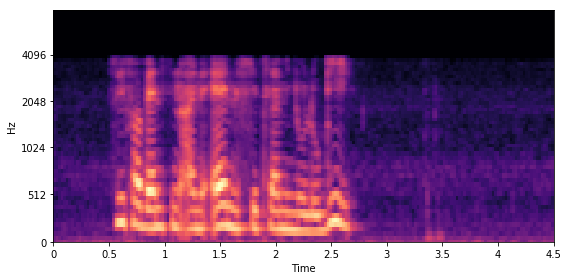

In [113]:
import matplotlib.pyplot as plt
import librosa.display
y,sr = librosa.load('wav_data/de/de10-001_25231.wav')
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64,fmax=8000)
plt.figure(figsize=(8, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Mel spectrogram')
plt.tight_layout()

[[ 10.16789063 -17.90499097 -11.3131335  ...   3.01123575   2.98608221
   -0.44743635]
 [ 10.04917196 -15.19346524  -5.75804356 ...   2.72529426  11.43847962
    2.39335852]
 [ 10.05019242 -14.92593088  -3.33824448 ...  -3.03457173   4.25061873
    6.71489449]
 ...
 [ 10.36977266 -12.89117615  -6.43181526 ...  -4.20618033   7.43708556
   -5.57679456]
 [ 10.33548343 -14.4044726   -6.38428727 ...   2.20253196  -0.31952256
   -0.30066824]
 [ 10.0692248  -13.72556612  -9.56491996 ...   5.69770314  -5.29758243
    2.29528794]]


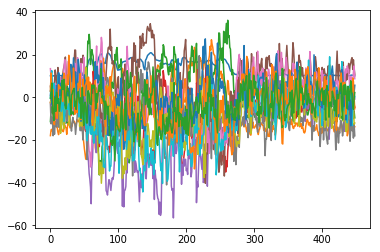

In [82]:
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt


(rate,sig) = wav.read("wav_data/de/de10-001_25231.wav")
mfcc_feat = mfcc(sig,rate)
#fbank_feat = logfbank(sig,rate)

print(mfcc_feat)
plt.plot(mfcc_feat)
plt.show()


#print(fbank_feat)

In [0]:
def create_model_xception(n_out=6):

    base_model = MobileNetV2(weights=None, include_top=False)
    
    x0 = base_model.output
    x1 = GlobalAveragePooling2D()(x0)
    x2 = GlobalMaxPooling2D()(x0)
    x = Concatenate()([x1,x2])
    
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

#     x = Dense(128, activation='relu')(x)
#     x = BatchNormalization()(x)
#     x = Dropout(0.3)(x)
    
    predictions = Dense(n_out, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [0]:
from keras.applications import *

In [0]:
from sklearn.model_selection import StratifiedKFold
oof_y = np.zeros_like(Y, dtype='float32')
test_Y = np.zeros((len(test_files), 80), dtype='float32')

kfold = StratifiedKFold(5)

In [0]:
train_dir = "fastlogmel/train/"
valid_dir = "fastlogmel/valid/"
model = define_model()
#model = create_model_xception(6)
batch_size=32
model.compile(loss='categorical_crossentropy',optimizer=Adam(0.001),metrics=['accuracy'])
model.summary()
data_gen_args = dict(zca_whitening=True,featurewise_center=True,featurewise_std_normalization=True)
image_datagen = ImageDataGenerator(**data_gen_args,preprocessing_function=eraser)
#image_datagen.fit(zca,augment=True)
train_generator_1 = MixupImageDataGenerator(generator=image_datagen,
                                          directory=train_dir,
                                          batch_size=batch_size,
                                          img_height=img_height,
                                          img_width=img_width)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8,
                              patience=3, min_lr=0.000001)
stop = EarlyStopping(monitor='val_loss',patience = 15)

test_datagen = ImageDataGenerator()
train_generator = image_datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size=32)
validation_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(img_width, img_height),
        batch_size=32)
mcp_save = ModelCheckpoint('mdl_wts_combined.hdf5', verbose=1, save_best_only=True,save_weights_only=False, monitor='val_loss', mode='min')

model.fit_generator(
        train_generator_1,
        steps_per_epoch=(4905//32),
        epochs=100,
        validation_data=validation_generator,
        validation_steps=(1095//32),
        callbacks=[reduce_lr,mcp_save,stop])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 288, 288, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 143, 143, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 143, 143, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)    

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:339: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 4905 images belonging to 6 classes.
Found 4905 images belonging to 6 classes.
Found 4905 images belonging to 6 classes.
Found 1095 images belonging to 6 classes.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:718: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


153/153 [==============================] - 87s 568ms/step - loss: 4.7848 - acc: 0.1771 - val_loss: 2.7937 - val_acc: 0.1912

Epoch 00001: val_loss improved from inf to 2.79372, saving model to mdl_wts_combined.hdf5
Epoch 2/100
153/153 [==============================] - 77s 506ms/step - loss: 2.0242 - acc: 0.1819 - val_loss: 1.7711 - val_acc: 0.2615

Epoch 00002: val_loss improved from 2.79372 to 1.77108, saving model to mdl_wts_combined.hdf5
Epoch 3/100
153/153 [==============================] - 75s 489ms/step - loss: 1.7406 - acc: 0.2593 - val_loss: 1.7173 - val_acc: 0.2860

Epoch 00003: val_loss improved from 1.77108 to 1.71729, saving model to mdl_wts_combined.hdf5
Epoch 4/100
153/153 [==============================] - 75s 488ms/step - loss: 1.6446 - acc: 0.3335 - val_loss: 1.6174 - val_acc: 0.3594

Epoch 00004: val_loss improved from 1.71729 to 1.61739, saving model to mdl_wts_combined.hdf5
Epoch 5/100
153/153 [==============================] - 75s 491ms/step - loss: 1.5836 - acc: 